# Statistic for AI and Data Science Coursework 2 - Yiquan Shao

## Report —— Using Variables to Predict the Current Condition of Bridges

The aim of this notebook is to show how to process original data and carry out an exploratory analysis of data with both continuous and categorical variables;

Use regression modelling to look at the effect of predictor variables(the age of bridges, etc.) on a target variable(the current condition of bridges), 
and see below for details.

**Contents**

 1. Data Preparation
 2. Exploratory Analysis
 3. Regression Modelling
 4. Final conclusion

## 1. Data Preparation

### 1.1 Import libraries for programming and original data 
* From the file "tx19_bridges_sample.csv" , and now we can see the original data in the form of table named as **"bridges"**.

In [531]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   # this is an additional plotting library
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [532]:
types_dict = { "Structure_id": str, "District":"category", "Toll":"category", 
              "Maintainer":"category", "Urban":"category", "Status":"category", 
              "Historic":"category", "Service_under":"category", "Material":"category", 
              "Design":"category", 
              "Deck_rating":"category", "Superstr_rating":"category", "Substr_rating":"category", 
              "Scour_rating":"category"}

bridges = pd.read_csv("tx19_bridges_sample.csv", dtype = types_dict, index_col = "Structure_id")
print("The original table bridges is presented as below:")
bridges

The original table bridges is presented as below:


,District,Detour_Km,Toll,Maintainer,Urban,Status,Year,Lanes_on,Lanes_under,AverageDaily,...,Spans,Length,Width,Deck_rating,Superstr_rating,Substr_rating,Rated_load,Trucks_percent,Scour_rating,Future_traffic
Structure_id,,,,,,,,,,,,,,,,,,,,,
000021521-00101,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,2,31.4,4.3,Good,Very Good,Very Good,41.7,0.0,Dry,1
000021521-00181,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,1,15.5,4.3,Good,Good,Very Good,41.7,0.0,Dry,1
000021521-TMP20,District2,199,Free,Agency,Rural,Local,2012,2,0,100,...,1,10.1,8.4,Very Good,Very Good,Very Good,48.1,0.0,Dry,150
000021525-00012,District2,199,Free,Agency,Rural,Local,1950,1,0,80,...,14,45.4,3.7,Good,Good,Poor,10.0,0.0,Dry,120
000021580-00092,District2,6,Free,Agency,Rural,Local,2004,2,0,150,...,1,25.0,7.3,Good,Very Good,Very Good,37.2,4.0,Dry,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DAPFORHOO000012,District9,0,Free,Military,Urban,Local,1994,3,0,300,...,3,45.4,19.0,Good,Good,Good,64.3,40.0,No waterway,600
DAPFORHOO000013,District9,0,Free,Military,Urban,Local,2000,2,0,300,...,1,12.3,10.8,Good,Good,Good,35.1,40.0,No waterway,600
DAPFORHOO000015,District9,0,Free,Military,Urban,Minor,1996,2,7,1200,...,4,73.2,9.8,Good,Good,Good,24.5,25.0,No waterway,1500


#### 1.1.1 Introduce the Variables

| Variable      |      Description             | Type | 
|:--------------|:-----------------------------|:------:|
|Structure_id   | Unique identifier of the bridge                  | String |
|District       | Highway district in Texas responsible for bridge | category | 
|Detour_Km      | Length of detour if bridge closed                | continuous |
|Toll           | Whether a toll is paid to use bridge             | category |
|Maintainer     | The authority responsible for maintenance        | category |
|Urban          | Whether the bridge is located in an urban or rural area   | category |
|Status         | The road class: interstate to local                       | category | 
|Year           | The year the bridge was built                             | continuous | 
|Lanes_on       | The number of lanes that run over the bridge              | continuous (or discrete) |
|Lanes_under    | The number of lanes that run under the bridge             | continuous (or discrete) |
|AverageDaily   | The average daily traffic (number of vehicles)            | continuous |
|Future_traffic | The estimated daily traffic in approx 20 years time       | continuous |
|Trucks_percent | The percent of traffic made up of 'trucks' (i.e. lorries) | continuous |
|Historic       | Whether the bridge is historic                            | category | 
|Service_under  | The (most important) service that runs under the bridge   | category |
|Material       | The dominant material the bridge is made from             | category |
|Design         | The design of the bridge                                  | category |
|Spans          | The number of spans the bridge has                        | category (or discrete) |
|Length         | The length of the bridge in metres                        | continuous |
|Width          | The width of the bridge in metres                         | continuous |
|Rated_load     | The rated max loading of bridge (in tonnes)               | continuous |
|Scour_rating   | Only for bridges over water: the 'scour' condition        | category |
|Deck_rating    | The condition of the deck of the bridge                   | category |
|Superstr_rating| The condition of the bridge superstructure                | category |
|Substr_rating  | The condition of the bridge substructure (foundations)    | category |

**Note on 'scour'**: when a bridge is over (for example) a river, the flow of water in the river can undermine any bridge supports (called 'piers') in the water. This is called 'scouring' . The `Scour_rating` gives the condition with respect to possible damage from scouring. 
 
**Values of Categorical Variables** In the original data, the values of the categorical variables are represented as integers, with their meanings given in a data dictionary. In our dataset, these 'numeric codes' have been replaced with suitable names.

| Variable      |      Values            |
|:--------------|:-----------------------|
|District       | Each district has a unique number  |
|Toll           | Toll, Free                |
|Maintainer     | State, County, Town or City, Agency, Private, Railroad, Toll Authority, Military, Unknown |
|Urban          | Urban, Rural |
|Status         | Interstate, Arterial, Minor, Local |
|Historic       | Register, Possible, Unknown, Not historic |
|Service_under  | Other, Highway, Railroad, Pedestrian, Interchange, Building |
|Material       | Other, Concrete, Steel, Timber, Masonry |
|Design         | Other, Slab, Beam, Frame, Truss, Arch, Suspension, Movable, Tunnel, Culvert, Mixed |
|Scour_rating   | Unknown, Critical, Unstable, Stable, Protected, Dry, No waterway |
|Deck_rating    | *Rating*: NA, Excellent, Very Good, Good, Satisfactory, Fair, Poor, Serious, Critical, Failing, Failed |
|Superstr_rating| *Rating* |
|Substr_rating  | *Rating* |

### 1.2 Get the necessary variables from bridges 
* In this report, we will only use these **["Year", "AverageDaily", "Trucks_percent", "Material", "Design"]** variable as predictor.
* Using **[ "Deck_rating", "Superstr_rating", "Substr_rating"]** as condition variables.
* put them into a new table called **"New_dataset"**.

#### 1.2.1 Exclude NAN value
* There are some NAN value in **New_dataset**, we need to drop these useless rows to guarantee the validity of the data.

In [533]:
New_dataset = bridges.loc[:,["Year", "AverageDaily", "Trucks_percent", "Material", "Design", "Deck_rating", "Superstr_rating", "Substr_rating"]]
New_dataset = New_dataset.dropna()
print("Now we get the first vision of New_dataset for analysis:")
New_dataset

Now we get the first vision of New_dataset for analysis:


,Year,AverageDaily,Trucks_percent,Material,Design,Deck_rating,Superstr_rating,Substr_rating
Structure_id,,,,,,,,
000021521-00101,2005,1,0.0,Concrete,Slab,Good,Very Good,Very Good
000021521-00181,2005,1,0.0,Concrete,Slab,Good,Good,Very Good
000021521-TMP20,2012,100,0.0,Concrete,Beam,Very Good,Very Good,Very Good
000021525-00012,1950,80,0.0,Timber,Beam,Good,Good,Poor
000021580-00092,2004,150,4.0,Concrete,Beam,Good,Very Good,Very Good
...,...,...,...,...,...,...,...,...
DAPFORHOO000012,1994,300,40.0,Concrete,Beam,Good,Good,Good
DAPFORHOO000013,2000,300,40.0,Concrete,Beam,Good,Good,Good
DAPFORHOO000015,1996,1200,25.0,Concrete,Beam,Good,Good,Good


### 1.3 Create "Age" variable and drop "Year" variable
* We want to use the Age of bridges as variable, so derive "Age" from the "Year" variable with age in years (Age = 2022 - Year).
* Drop the "Year" variable since we get the "Age" variable.

In [534]:
New_dataset = New_dataset.assign(Age =2022 - bridges.Year)
New_dataset = New_dataset.drop(["Year"], axis=1)
New_dataset

,AverageDaily,Trucks_percent,Material,Design,Deck_rating,Superstr_rating,Substr_rating,Age
Structure_id,,,,,,,,
000021521-00101,1,0.0,Concrete,Slab,Good,Very Good,Very Good,17
000021521-00181,1,0.0,Concrete,Slab,Good,Good,Very Good,17
000021521-TMP20,100,0.0,Concrete,Beam,Very Good,Very Good,Very Good,10
000021525-00012,80,0.0,Timber,Beam,Good,Good,Poor,72
000021580-00092,150,4.0,Concrete,Beam,Good,Very Good,Very Good,18
...,...,...,...,...,...,...,...,...
DAPFORHOO000012,300,40.0,Concrete,Beam,Good,Good,Good,28
DAPFORHOO000013,300,40.0,Concrete,Beam,Good,Good,Good,22
DAPFORHOO000015,1200,25.0,Concrete,Beam,Good,Good,Good,26


### 1.4 Exclude very old bridges
We need exclude some extreme data, too old bridges could bring some extreme variables to causes an exception for the entire dataset, so we have to recognise these old bridges and exclude these from the original table.

#### 1.4.1 The histogram of Age in bridges
* We use the histogram to see the distribution of "Age" variable, it is obvious that the number in "Age" **after 100** are smaller than others.

Text(0.5, 1.0, 'The histogram of Age')

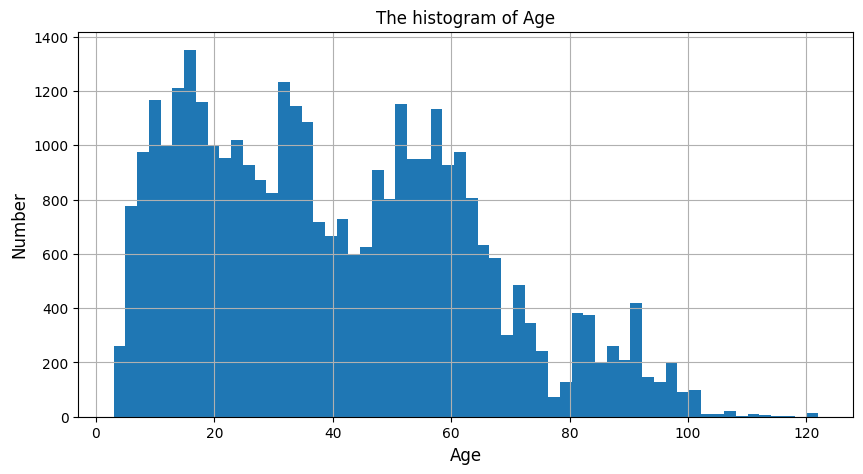

In [535]:
Age1 = New_dataset.loc[:, "Age"]
Age1.hist(grid = True, bins=60,figsize=(10,5))
plt.xlabel("Age", fontsize=12)
plt.ylabel("Number", fontsize=12)
plt.title('The histogram of Age', fontsize=12)

#### 1.4.2 The table and bar chart of the Age between 100 and 122
* We look further Age at 100 and beyond and notice that the number in the Age **from 103 to 122** are obviously smaller than others, so we can confirm the **Age >= 103** as the historic one.

The table of the Age between 100 and 122


Age,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,116,117,118,121,122
Number,65,42,57,6,4,3,8,10,10,1,2,4,7,2,4,1,1,1,1,12


Text(0.5, 1.0, 'The bar chart of the Age between 100 and 122')

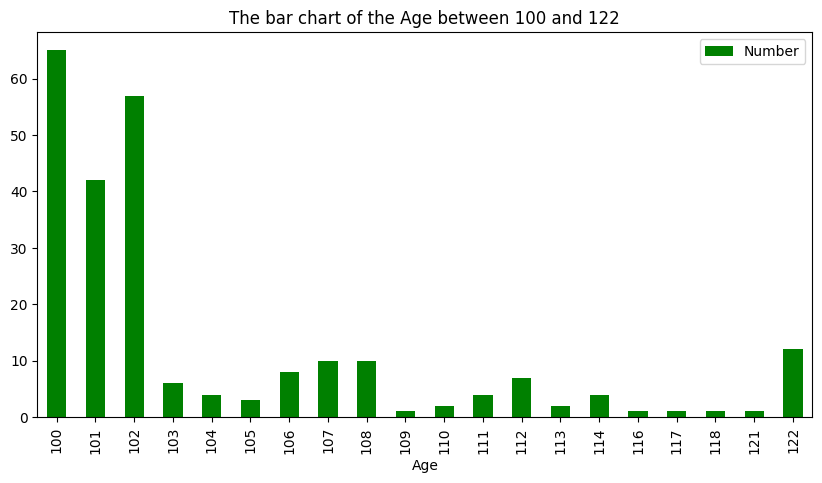

In [536]:
Historic = New_dataset.loc[(New_dataset.loc[:, "Age"] >= 100)]
Historic = Historic.assign(Number = 1)
p1 = Historic.pivot_table(index=["Age"], values=["Number"], aggfunc="count").sort_index(axis=1, ascending=False)
print("The table of the Age between 100 and 122")
display(p1.transpose())
p1.plot(kind = "bar",color="g",figsize=(10,5))
plt.title('The bar chart of the Age between 100 and 122')

#### 1.4.3 Exclude bridges that **Age >= 103**

In [537]:
New_dataset = New_dataset.loc[(New_dataset.loc[:,"Age"] < 103)]
display(New_dataset)
Max = New_dataset.Age.max()
Min = New_dataset.Age.min()
print("Now the Age variable in the table range is [" + str(Min) + "," + str(Max) + "]")

,AverageDaily,Trucks_percent,Material,Design,Deck_rating,Superstr_rating,Substr_rating,Age
Structure_id,,,,,,,,
000021521-00101,1,0.0,Concrete,Slab,Good,Very Good,Very Good,17
000021521-00181,1,0.0,Concrete,Slab,Good,Good,Very Good,17
000021521-TMP20,100,0.0,Concrete,Beam,Very Good,Very Good,Very Good,10
000021525-00012,80,0.0,Timber,Beam,Good,Good,Poor,72
000021580-00092,150,4.0,Concrete,Beam,Good,Very Good,Very Good,18
...,...,...,...,...,...,...,...,...
DAPFORHOO000012,300,40.0,Concrete,Beam,Good,Good,Good,28
DAPFORHOO000013,300,40.0,Concrete,Beam,Good,Good,Good,22
DAPFORHOO000015,1200,25.0,Concrete,Beam,Good,Good,Good,26


Now the Age variable in the table range is [3,102]


### 1.5 Reduce the number of categories of materials and design

Reducing the number of categorical variables for easier subsequent analysis and calculations. 

* Firstly, see the table of different Material's proportion.

In [538]:
p2 = New_dataset.pivot_table(columns=["Material"], aggfunc="size")
p2 = pd.DataFrame(data = p2 ,columns=["Number"])
p2 = p2.assign(Proportion = p2.Number/p2.Number.sum())
p2

,Number,Proportion
Material,,
Concrete,27081,0.791634
Masonry,11,0.000322
Other,48,0.001403
Steel,6604,0.193049
Timber,465,0.013593


* Secondly, see the table of different Design's proportion.

In [539]:
p4 = New_dataset.pivot_table(columns=["Design"], aggfunc="size")
p4 = pd.DataFrame(data = p4 ,columns=["Number"])
p4 = p4.assign(Proportion = p4.Number/p4.Number.sum())
p4

,Number,Proportion
Design,,
Arch,139,0.004063
Beam,28297,0.827180
Frame,68,0.001988
Movable,13,0.000380
Other,1240,0.036248
Slab,4330,0.126575
Suspension,5,0.000146
Truss,117,0.003420


#### 1.5.1 Merging small Material categories
As we can see from the table of different Material's proportion, the proportions of **Masonry, Other and Timber** are small, so we combine these data into one category **"Other"**.

In [540]:
New_dataset = New_dataset.replace(["Masonry","Timber"], ["Other", "Other"])

Now we get a new table of proportions of Material's proportion.

In [541]:
p3 = New_dataset.pivot_table(columns=["Material"], aggfunc="size")
p3 = pd.DataFrame(data = p3 ,columns=["Number"])
p3 = p3.assign(Proportion = p3.Number/p3.Number.sum())
p3

,Number,Proportion
Material,,
Concrete,27081,0.791634
Other,524,0.015318
Steel,6604,0.193049


#### 1.5.2 Merging small Design categories
As we can see from the table of different Design's proportion, the proportions of **Arch, Frame, Movable, Suspension and Truss** are small, so we combine these data into one category **"Other"**.

In [542]:
New_dataset = New_dataset.replace(["Arch","Frame","Movable","Suspension","Truss"], ["Other", "Other", "Other", "Other", "Other"])

Now we get a new table of proportions of Design's proportion.

In [543]:
p5 = New_dataset.pivot_table(columns=["Design"], aggfunc="size")
p5 = pd.DataFrame(data = p5 ,columns=["Number"])
p5 = p5.assign(Proportion = p5.Number/p5.Number.sum())
p5

,Number,Proportion
Design,,
Beam,28297,0.827180
Other,1582,0.046245
Slab,4330,0.126575


### 1.6 Combine three main condition variables
* Condition variables are : **Deck_rating, Superstr_rating and Substr_rating**.
* Transform the categories values in condition: **["Failed", "Failing", "Critical", "Serious", "Poor", "Fair", "Satisfactory", "Good", "Very Good", "Excellent", "NA"]**   
to integer score **[0,1,2,3,4,5,6,7,8,9,0]** accordingly.

In [544]:
Bridges_data = New_dataset.replace(["Failed", "Failing", "Critical", "Serious", "Poor", "Fair", "Satisfactory", "Good", "Very Good", "Excellent"],
                                   [0,1,2,3,4,5,6,7,8,9])

In [545]:
#change the attribute of the column to interger
Bridges_data = Bridges_data.astype({"Deck_rating":"int64", "Superstr_rating":"int64", "Substr_rating":"int64"}) 

* Sum three condition variables, and put the sum into a new column **"Current_condition"**.
* Drop the three main condition variables, since we get a new combined variable and treat it as **the target variable**.
* Now we get the final table called **"Bridge_data"** in the stage of data preparation shown as below.

In [546]:
Bridges_data = Bridges_data.assign(Current_condition = Bridges_data.Deck_rating + Bridges_data.Superstr_rating + Bridges_data.Substr_rating)
Bridges_data = Bridges_data.drop(["Deck_rating", "Superstr_rating", "Substr_rating"], axis=1)
print("Here is the new table for analysis called Bridges_data")
Bridges_data

Here is the new table for analysis called Bridges_data


,AverageDaily,Trucks_percent,Material,Design,Age,Current_condition
Structure_id,,,,,,
000021521-00101,1,0.0,Concrete,Slab,17,23
000021521-00181,1,0.0,Concrete,Slab,17,22
000021521-TMP20,100,0.0,Concrete,Beam,10,24
000021525-00012,80,0.0,Other,Beam,72,18
000021580-00092,150,4.0,Concrete,Beam,18,23
...,...,...,...,...,...,...
DAPFORHOO000012,300,40.0,Concrete,Beam,28,21
DAPFORHOO000013,300,40.0,Concrete,Beam,22,21
DAPFORHOO000015,1200,25.0,Concrete,Beam,26,21


## 2. Exploratory Analysis

### 2.1 The relationship between continuous variables

#### 2.1.1 Calculate the correlation
Use the final table presented above to calculate and show the correlation between continuous variables.
* A linear correlation coefficient that returns a value of between -1 and +1. -1 means there is a strong negative correlation and +1 means that there is a strong positive correlation. A 0 means that there is no correlation (this is also called zero correlation);
* Only absolute values of correlation > 0.3 show there is a correlation between two variables;
* So we will mainly focus absolute values of correlation > 0.3; 

#### 2.1.2 The table of correlations
The absolute vales > 0.3 in ths table will be highlighted; and the negative values will in red colour in this table.

In [547]:
print("Here is the table of correlations of continuous variables") 
Correlations = Bridges_data.corr()
def style_negative(v, props=""):
    return props if v < 0 else None
s = Correlations.style.applymap(style_negative, props="color:red;")\
              .applymap(lambda v: "opacity: 20%;" if (v < 0.3) and (v > -0.3) else None)
s

Here is the table of correlations of continuous variables


,AverageDaily,Trucks_percent,Age,Current_condition
AverageDaily,1.000000,0.022985,-0.056584,0.036944
Trucks_percent,0.022985,1.000000,0.222450,-0.046380
Age,-0.056584,0.222450,1.000000,-0.592882
Current_condition,0.036944,-0.046380,-0.592882,1.000000


#### 2.1.3 The heatmap of correlations
Use heatmap to visualise the correlations, the shade and kind of color will change according to the size of the number.

Text(0.5, 1.0, 'The heatmap of continuous variables of bridges')

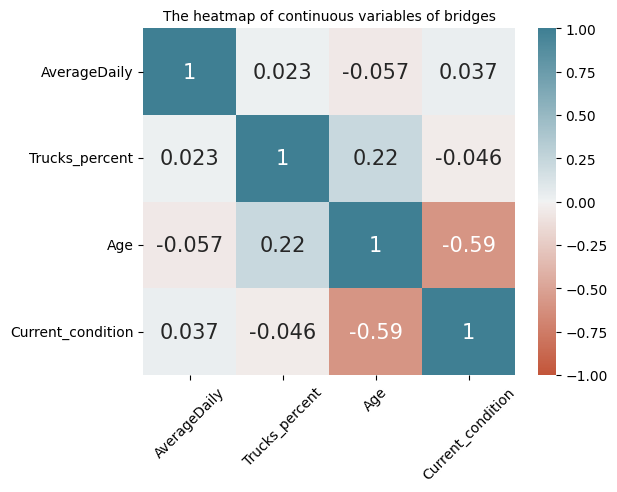

In [548]:
# print("Here is the heatmap of continuous variables")
fig,ax = plt.subplots(1,1, figsize=(6,4.5))
sns.heatmap(Bridges_data.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), 
           annot=True, ax=ax, annot_kws={"size": 15})
_y = plt.yticks(rotation=0, fontsize=10)
_x = plt.xticks(rotation=45, fontsize=10)
plt.title("The heatmap of continuous variables of bridges", fontsize=10)

#### 2.1.4 Analysis
* Since the Correlation number of age and Current_condition is -0.59, Age has a strong negative impact on Current_condition. In short, the older the bridges, the worse the condition of the bridge.
* Other variables has nearly no relationship between each other.

### 2.2 The relationship continuous and categorical variables

We use boxplot to see different distribution of Material and Design separately in one continuous variable accordingly.

#### 2.2.1 The boxplot of Current_condition with Material and Design

Text(0, 0.5, 'Current_condition')

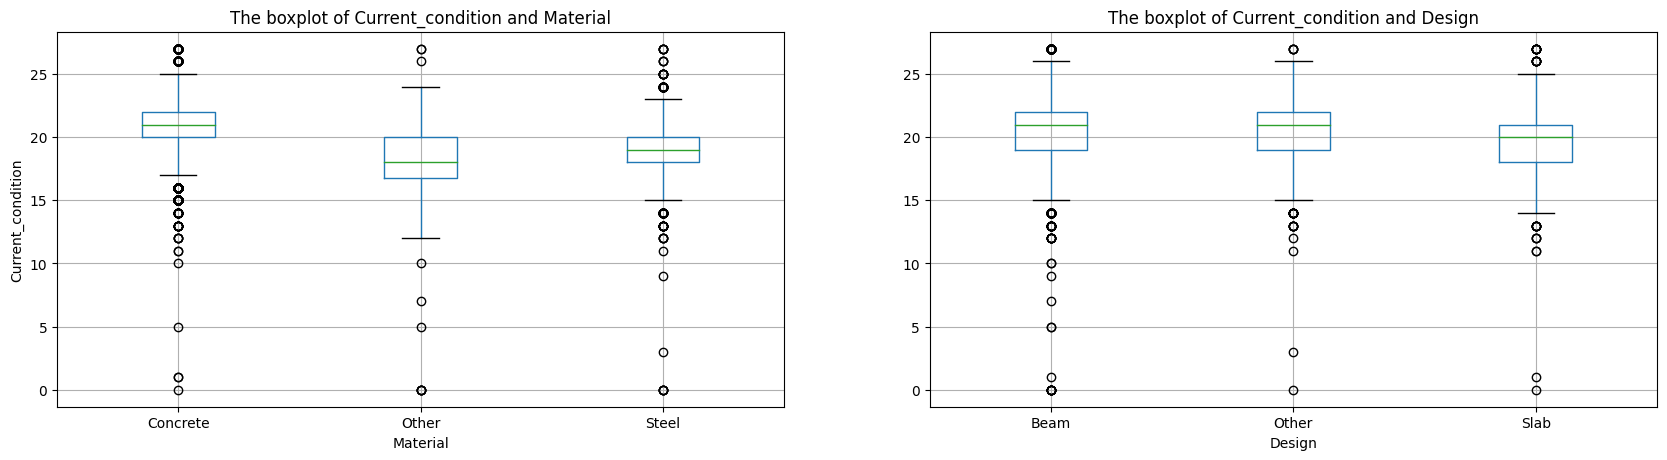

In [549]:
fig, (a1, a2) = plt.subplots(1,2, figsize=(20,5))

Bridges_data.boxplot(column='Current_condition', by='Material', ax=a1)
Bridges_data.boxplot(column='Current_condition', by='Design', ax=a2)

#Make the plots a bit clearer
fig.suptitle('')
a1.set_title('The boxplot of Current_condition and Material')
a2.set_title('The boxplot of Current_condition and Design')
a1.set_ylabel('Current_condition')

##### 2.2.1.1 Analysis
* Material : Concrete has a better bridges' condition than Steel and Other.
* Design : Beam and other have better bridges' condition than Slab, but the difference in design is not very obvious.

#### 2.2.2 The boxplot of Age with Material and Design

Text(0, 0.5, 'Age')

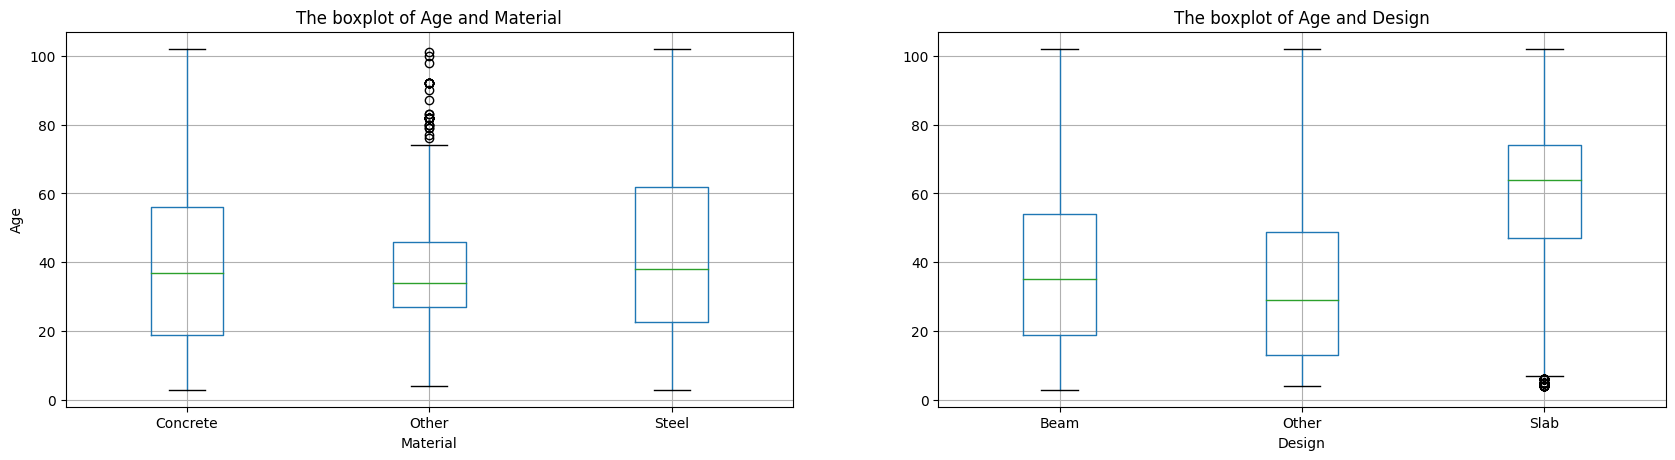

In [550]:
fig, (a3, a4) = plt.subplots(1,2, figsize=(20,5))

Bridges_data.boxplot(column='Age', by='Material', ax=a3)
Bridges_data.boxplot(column='Age', by='Design', ax=a4)

#Make the plots a bit clearer
fig.suptitle('')
a3.set_title('The boxplot of Age and Material')
a4.set_title('The boxplot of Age and Design')
a3.set_ylabel('Age')

##### 2.2.2.1 Analysis
* Material : Concrete and Steel have similar Age distribution, and other are younger than these two.
* Design : Slab is older than Beam and Other.

#### 2.2.3 The boxplot of Trucks_percent with Material and Design

Text(0, 0.5, 'Trucks_percent')

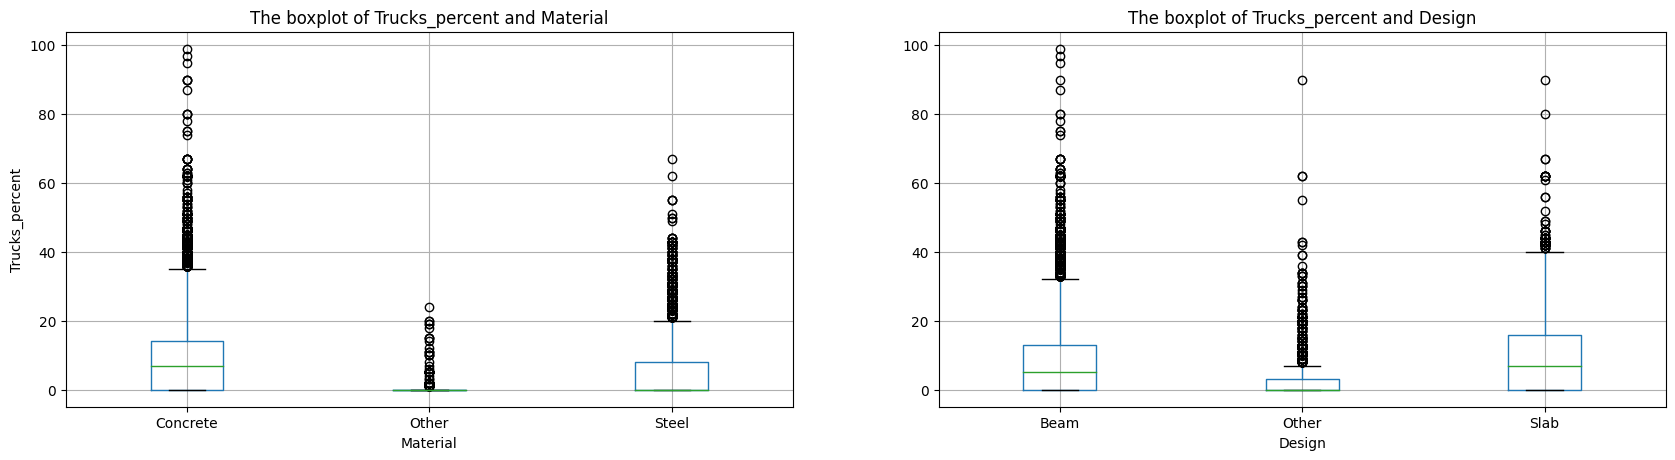

In [551]:
fig, (a5, a6) = plt.subplots(1,2, figsize=(20,5))

Bridges_data.boxplot(column='Trucks_percent', by='Material', ax=a5)
Bridges_data.boxplot(column='Trucks_percent', by='Design', ax=a6)

#Make the plots a bit clearer
fig.suptitle('')
a5.set_title('The boxplot of Trucks_percent and Material')
a6.set_title('The boxplot of Trucks_percent and Design')
a5.set_ylabel('Trucks_percent')

##### 2.2.3.1 Analysis
* Material : Sort by Truck_percentage from high to low: Concrete > Steel > Other.
* Design : Sort by Truck_percentage from high to low: Slab > Beam > Other.

#### 2.2.4 The boxplot of AverageDaily with Material and Design

Text(0, 0.5, 'AverageDaily')

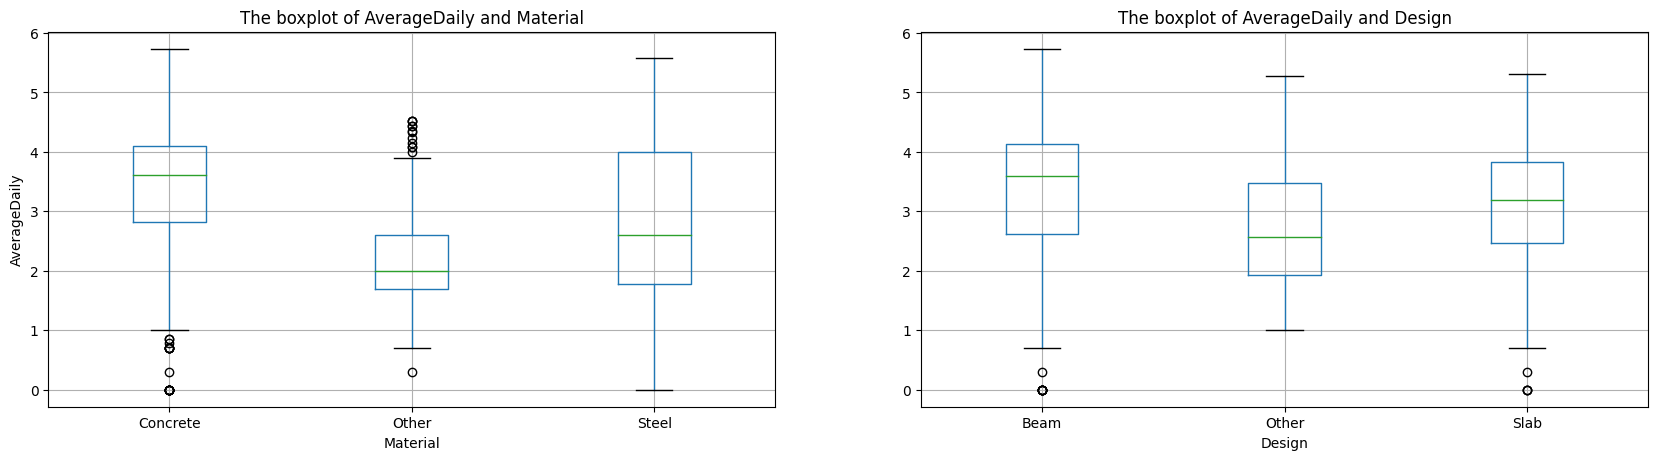

In [552]:
#ignore the python waring
import warnings
warnings.filterwarnings("ignore") 
#use log function to process the data for better visualization
brd_logs = Bridges_data.assign(AverageDailyLog = np.log10(bridges.AverageDaily))
fig, (a7, a8) = plt.subplots(1,2, figsize=(20,5))

brd_logs.boxplot(column='AverageDailyLog', by='Material', ax=a7)
brd_logs.boxplot(column='AverageDailyLog', by='Design', ax=a8)

#Make the plots a bit clearer
fig.suptitle('')
a7.set_title('The boxplot of AverageDaily and Material')
a8.set_title('The boxplot of AverageDaily and Design')
a7.set_ylabel('AverageDaily')

##### 2.2.3.1 Analysis
* Material : Sort by AverageDaily from high to low: Concrete > Steel > Other.
* Design : Sort by AverageDaily from high to low: Beam > Slab > Other.

### 2.3 The relationship categorical and categorical variables

#### 2.3.1 The table of ratio of Material and Design

This table shows ratio of each other in categorical variables, the sum of all values in table is 100.

In [553]:
des_and_mat = pd.crosstab(Bridges_data.Design, [Bridges_data.Material], normalize='all')
mat_and_des = pd.crosstab(Bridges_data.Material, [Bridges_data.Design], normalize='all')
des_and_mat.round(4) * 100

Material,Concrete,Other,Steel
Design,,,
Beam,63.41,1.36,17.95
Other,3.10,0.18,1.35
Slab,12.66,0.00,0.00


#### 2.3.2 The bar chart of ratio of Material and Design

Use bar chart visualise the table.

Text(0.5, 1.0, 'Joint Probability of Main Material and Design (plot 2)')

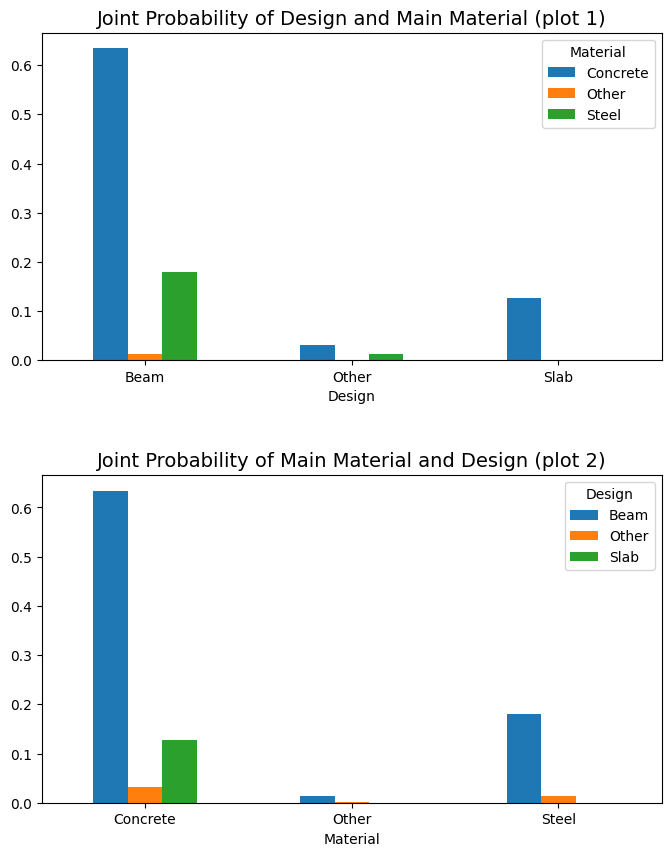

In [554]:
# Generate suitable axes
fig,(a1, a2) = plt.subplots(2,1,figsize=(8,10), sharey=False, sharex=False)
fig.subplots_adjust(hspace=0.35)

#Plot one tabulation on each axis WITH CAREFUL TITLES
des_and_mat.plot(kind='bar', subplots=False, ax=a1, rot=0)
a1.set_title('Joint Probability of Design and Main Material (plot 1)', fontsize=14)

mat_and_des.plot(kind='bar', subplots=False, ax=a2, rot=0)
a2.set_title('Joint Probability of Main Material and Design (plot 2)', fontsize=14)

#### 2.3.1 Analysis
* Most design use Concrete as material.
* Most material use Beam as design.
* Design in Beam, use concrete as material seems to be the main trend in bridges.

### 2.4 Preliminary Conclusion

* The age of the bridge and the material of the bridge have a obvious impact on the condition of the bridge.
* The older the bridges, the worse the condition of the bridge.
* Concrete bridges are in better condition than other materials.

## 3. Regression Modelling

### 3.1 Process categorical predictors
* Specify "Material" and "Design" two categorical variables.
* This is a necessary process for subsequent analysis and calculations.

 #### 3.1.1 Convert "Material" categorical variables into "0", "1" variables
 * According to the values of the category as the column heading, 0 means No, 1 means Yes.
 * Use these data to create a new table called **"Material"**.

In [555]:
Material = pd.get_dummies(Bridges_data.Material)
Material = Material.rename(columns={"Concrete":"Material_Concrete", "Other": "Material_Other", "Steel":"Material_Steel"})
Material_categories = ["Material_Concrete","Material_Other","Material_Steel"]
Material

,Material_Concrete,Material_Other,Material_Steel
Structure_id,,,
000021521-00101,1,0,0
000021521-00181,1,0,0
000021521-TMP20,1,0,0
000021525-00012,0,1,0
000021580-00092,1,0,0
...,...,...,...
DAPFORHOO000012,1,0,0
DAPFORHOO000013,1,0,0
DAPFORHOO000015,1,0,0


 #### 3.1.2 Convert "Design" categorical variables into "0", "1" variables 
 * According to the value of the category as the column heading, 0 means No, 1 means Yes.
 * Use these data to create a new table called **"Design"**.

In [556]:
Design = pd.get_dummies(Bridges_data.Design)
Design = Design.rename(columns={"Beam":"Design_Beam", "Other": "Design_Other", "Slab":"Design_Slab"})
Design_categories = ["Design_Beam","Design_Other","Design_Slab"]
Design

,Design_Beam,Design_Other,Design_Slab
Structure_id,,,
000021521-00101,0,0,1
000021521-00181,0,0,1
000021521-TMP20,1,0,0
000021525-00012,1,0,0
000021580-00092,1,0,0
...,...,...,...
DAPFORHOO000012,1,0,0
DAPFORHOO000013,1,0,0
DAPFORHOO000015,1,0,0


### 3.2 Modelling and calculation
* Use column **"Current_condition"** in table **"Bridge_data"** as target variable.
* Use column **"AverageDaily", "Trucks_percent", "Age"** in table **"Bridges_data"**; column **"Material_Concrete", "Material_Steel"** in table **"Material"**; use column **"Design_Beam", "Design_Slab"** in table **"Design"** as predictor variable.  
For reference encoding we use "Material_other", "Design_other" as a reference of Material and Design separately, so these two columns are not put into linear model. 

In [557]:
X = np.column_stack((Bridges_data.AverageDaily, Bridges_data.Trucks_percent, Bridges_data.Age, 
                     Material.Material_Concrete,  Material.Material_Steel, Design.Design_Beam, Design.Design_Slab))
y = Bridges_data.Current_condition

* The differing ranges of the predictors made the regression coefficient harder to compare. We can instead **standardise the values**. This makes the comparison easier. 

In [558]:
Z = StandardScaler().fit_transform(X)

* Then use linear regression to calculate R2 coefficient, Intercept, Regression coefficients and Root mean squared error (Round the value of results to four decimal places).

In [559]:
reg = LinearRegression().fit(Z, y)
print("The R2 coefficient of determination is %4.4f" % reg.score(Z, y))
print("The intercept is %4.4f" % reg.intercept_)
print("The regression coefficients are:")
coef = pd.DataFrame(reg.coef_.round(4), index=["AverageDaily", "Trucks_percent", "Age" , "Material_Concrete", "Material_Steel", "Design_Beam", 
                                      "Design_Slab"], columns =["Coefficient"])
coef.transpose()

The R2 coefficient of determination is 0.4512
The intercept is 20.3065
The regression coefficients are:


,AverageDaily,Trucks_percent,Age,Material_Concrete,Material_Steel,Design_Beam,Design_Slab
Coefficient,-0.0168,0.0556,-1.1535,1.1388,0.564,-0.0463,-0.064


In [560]:
y_pred = LinearRegression().fit(Z, y).predict(Z)
MSE = mean_squared_error(y, y_pred)
RMSE = MSE**1/2
print("Root mean squared error of this model is %.4f" %RMSE)

Root mean squared error of this model is 1.0937


### 3.2 Explanation of the result of Model and calculation
* **R2:** The coefficient of determination is a number between 0 and 1 that measures how well a statistical model predicts an outcome.  

|  Coefficient of determination (R2)     |      Interpretation             |
|:--------------|:-----------------------------|
|0  | The model does not predict the outcome.                  | 
|Between 0 and 1       | The model partially predicts the outcome. |
|1      | The model perfectly predicts the outcome.                | 

In this model, we got a **0.4512 R2** means this model with these predictor variables can partially predicts the bridges' conditions, 0.4512 means that five variables has 45.1% explanatory power for bridge conditions.  

* **Intercept:** the intercept in a multiple regression model is the mean for the response when all of the explanatory variables take on the value.  
In this model, **the intercept is 20.3065** shows the average current_condition of bridge is 20.3065.  

* **Regression coefficients:** A regression coefficient in multiple regression is the slope of the linear relationship between the response variable and the part of a predictor variable. The absolute value of coefficient of predict variable bigger means it has more influence on the response variable. A positive value represents a positive correlation; a negative number represents a negative correlation.

    Rank by absolute value(so as their influence on the bridges' conditions) :    
    Age > Material_Concrete > Material_Steel > Design_Slab > Trucks_percent > Design_Beam > AverageDaily  
    
    We only talk about top 3, because the rest predictor variables have very low values coefficients and nearly have no influence on bridges' condition.
      
     **Age (-1.1535)** shows Age is the most important factor in five predictors, has a negative impact on bridges' condition; The older the bridges, the worse the condition of the bridge.
      
     **Material_Concrete (1.1388)** shows Material_Concrete has a positive impact on bridges' condition; The bridges made up of concrete have better condition than others.
      
     **Material_Steel (0.5640)** shows Material_Steel has a weak positive impact on bridges' condition; The condition of steel bridges is second only to the situation of concrete bridges.
    

* **Root mean squared error:** Root mean squared error (RMSE) measures the amount of error in statistical models. It assesses the average root squared difference between the actual and predicted values. When a model has no error, the RMSE equals zero. As model error increases, its value increases. 
  
  In this model, **Root mean squared error is 1.0937** shows this model predicts the bridge condition well but still has error between the actual and predicted bridge condition equals to 1.0937.


### 3.3 The distribution of residuals (errors) in this model

We can use the `predict` method to return the predicted values of the target variable. Then we can calculate the errors and show their distribution.

Text(0, 0.5, 'Percentage')

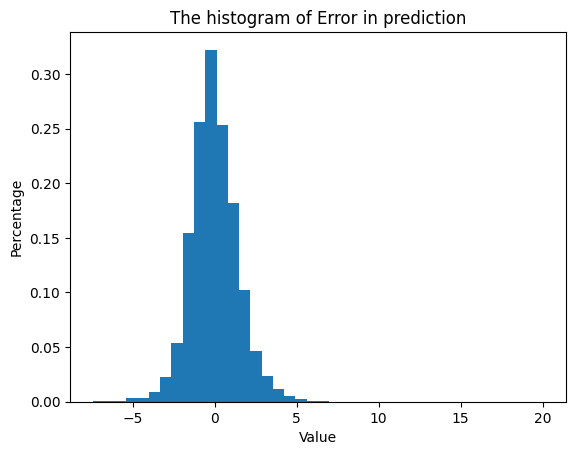

In [561]:
y_pred = reg.predict(Z)

fig, a1 = plt.subplots(1, 1)
residuals = y_pred - y
a1.hist(residuals, bins=40, density=True)
a1.set_title('The histogram of Error in prediction')
a1.set_xlabel('Value')
a1.set_ylabel('Percentage')

We can also plot a scatter of the actual values against the predicted values. If the regression fitted better, the points would be nearer to the red line. 

Text(0.5, 1.0, 'A scatter of the actual values against the predicted values')

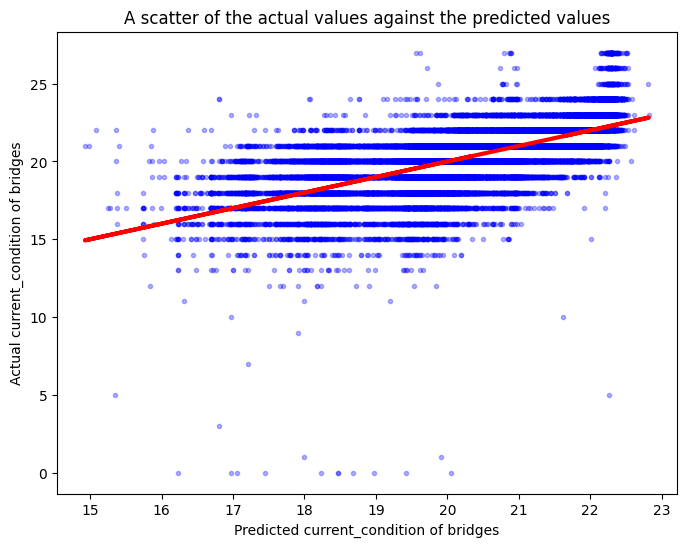

In [562]:
# Plot outputs
fig, a = plt.subplots(1,1,figsize=(8,6))
a.scatter(y_pred, y,  color='blue', marker=".",alpha=0.3)
a.plot(y_pred, y_pred, color='red', linewidth=3)
a.set_xlabel('Predicted current_condition of bridges')
a.set_ylabel('Actual current_condition of bridges')
a.set_title("A scatter of the actual values against the predicted values")

Though there still some error exit, this is unavoidable and acceptable.

## 4. Final Conclusion

* **The proposed variables can predict the bridge condition, but not enough and reasonable, because R2 of this model is only 0.4512, larger values of R2 are required to guarantee the validity of the predictive model.**
* **The Age of bridges("Age") has the greatest negative impact on bridge condition, the older the bridges, the worse the condition of the bridge;**
* **Material of concrete has a positive impact on bridges' condition, and Material of steel has a weaker positive impact on bridges' condition than concrete;**
* **AverageDaily, Trucks_percent and Design compared to other variables have little to no effect on bridge condition.**

### 4.1 Brief suggestions for further analysis

* Drop "AverageDaily", "Trucks_percent" and "Design" variables because they have little impact, and add more other variables(for instance, "Urban"|"length" etc.) into analysis;
* Get and use more bridge data for analysis, the more data there is, the more accurate the model predictions will be.